In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
properties = pd.read_table('properties_2016.csv', header=0, index_col=0, sep=',')

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Shape of `properties`

In [3]:
print(properties.shape)

(2985217, 57)


## Percentage of NAs in each columns

In [262]:
na_percents = properties.isnull().sum()/properties.shape[0]

## Dtype of each variable

In [264]:
summary = pd.concat([na_percents, properties.dtypes], axis=1)
summary.loc[summary[0]<0.5]

,0,1
bathroomcnt,0.003840,float32
bedroomcnt,0.003836,float32
buildingqualitytypeid,0.350637,float32
calculatedbathnbr,0.043183,float32
calculatedfinishedsquarefeet,0.018613,float32
finishedsquarefeet12,0.092467,float32
fips,0.003831,float32
fullbathcnt,0.043183,float32
heatingorsystemtypeid,0.394885,float32
latitude,0.003831,float32


## Fill NAs

In [271]:
for var in ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
           'finishedsquarefeet15', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt']:
    data[var] = data[var].fillna(data[var].dropna().mean())

## Generate new variables

In [273]:
properties['bed2bath'] = properties['bedroomcnt']/properties['bathroomcnt']
properties['bed2calbath'] = properties['bedroomcnt']/properties['calculatedbathnbr']
properties['areaperbedroom'] = properties['calculatedfinishedsquarefeet']/properties['bedroomcnt']
properties['livingarearate'] = properties['finishedsquarefeet12']/properties['finishedsquarefeet15']
properties['bed2fullbath'] = properties['bedroomcnt']/properties['fullbathcnt']
properties['areaperroom'] = properties['calculatedfinishedsquarefeet']/properties['roomcnt']
properties['houseage'] = 2016 - properties['yearbuilt']

In [3]:
def histgram_plot(series,
                  is_numeric=None,
                  na_ratio=-1):
    if is_numeric is None:
        raise ValueError('\'is_numeric\' must be specified.')
    if is_numeric:
        data = series.values
        data_plot = np.array(data[~np.isnan(data)])
        if len(np.unique(data_plot) > 1):
            plt.close()
            plt.hist(data_plot,
                     bins=20)
            plt.title(series.name+' (NA Ratio:{0:.2f}%)'.format(na_ratio))
            plt.ylabel('Frequency')
            plt.show()
        else:
            print("WARNING: Data only has a single value.")
    else:
        series_clean = series.loc[~series.isnull()].reset_index(drop=True)
        df = pd.DataFrame({'kind':series_clean.values,
                           'count': np.array([1]*len(series_clean))})
        df_group = df.groupby('kind').sum()
        y = np.array(df_group.index)
        y_pos = np.arange(len(y))+.3
        x = df_group['count'].values
        plt.close()
        plt.figure(figsize=(8, len(y)/3))
        plt.barh(bottom=y_pos, 
                 width=x, 
                 align='center', 
                 height=0.3)
        plt.yticks(y_pos, tuple(y))
        plt.ylim([-2,len(y)+2])
        plt.title(series.name+' (NA Ratio:{0:.2f}%)'.format(na_ratio))
        plt.xlabel('Count')
        plt.show()


## Histgrams for numerical varibles

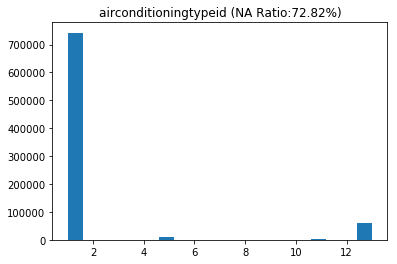

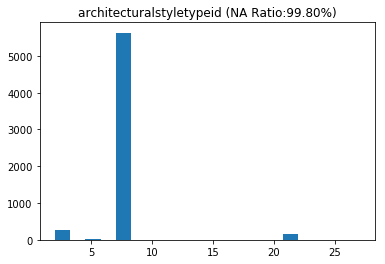

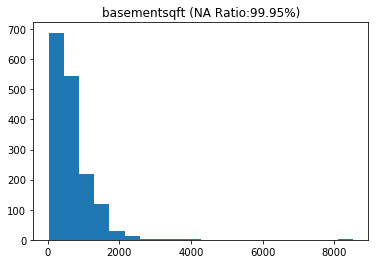

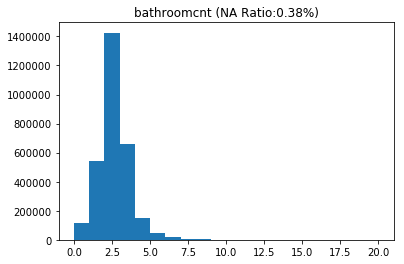

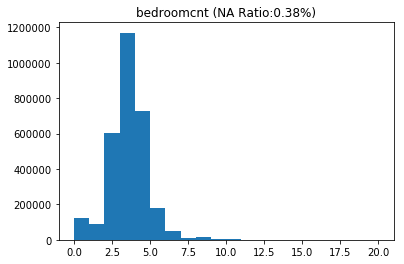

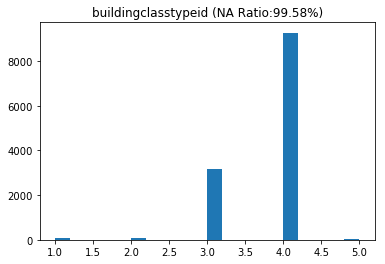

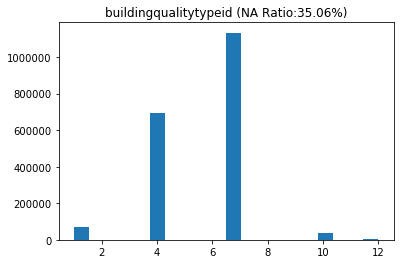

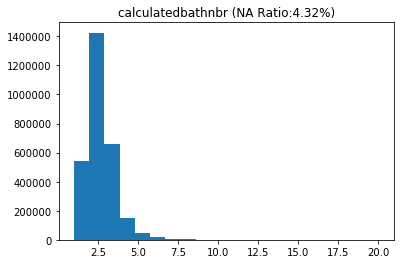

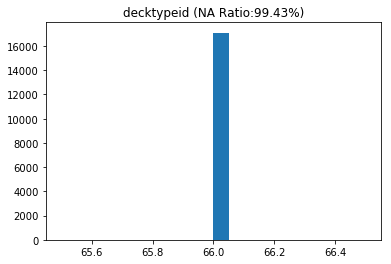

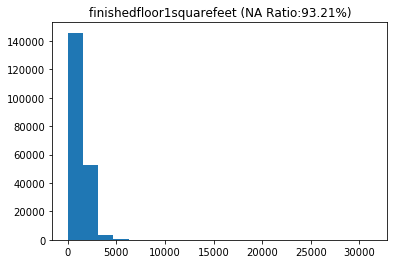

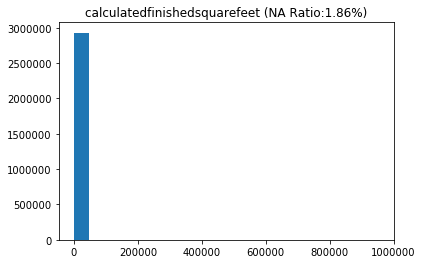

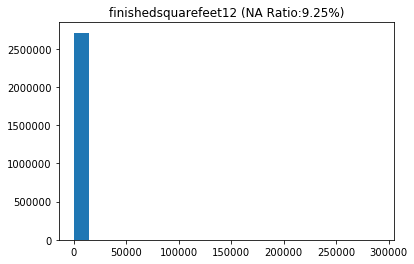

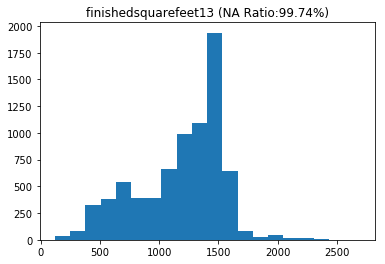

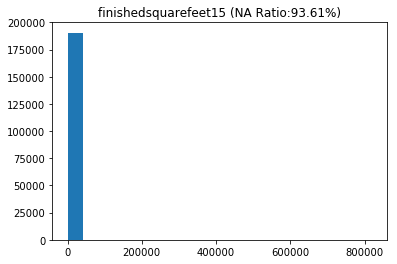

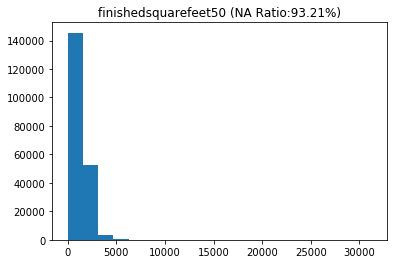

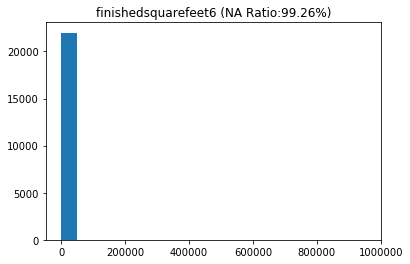

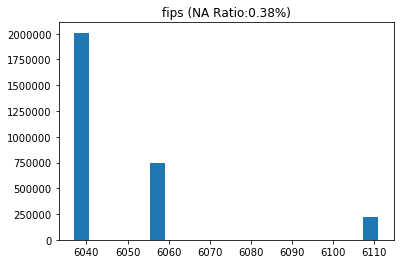

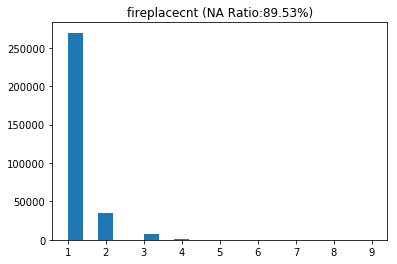

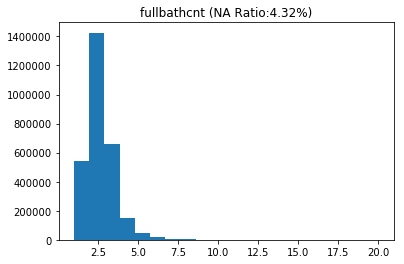

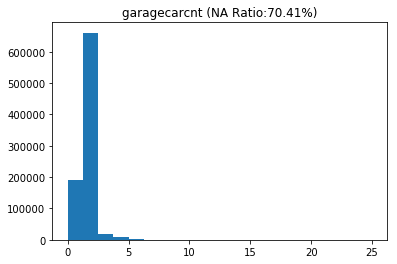

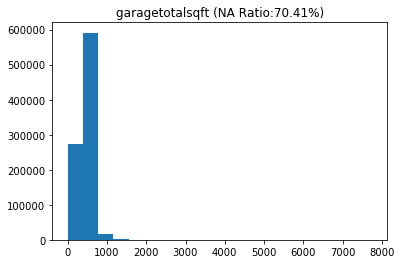

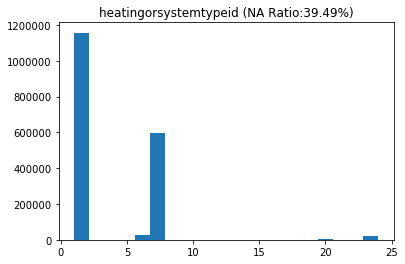

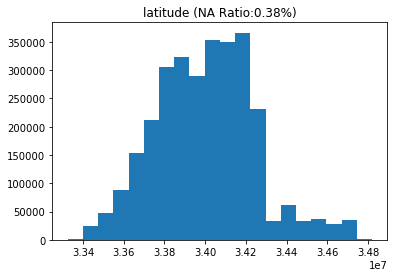

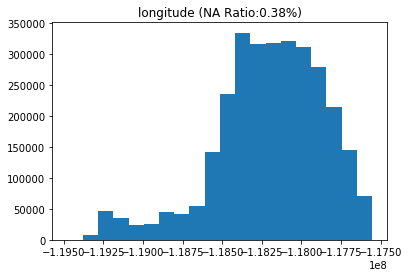

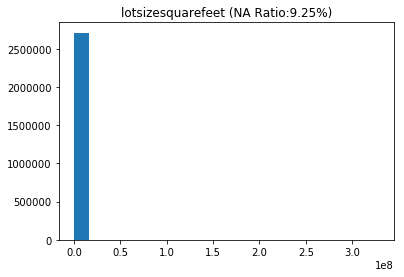

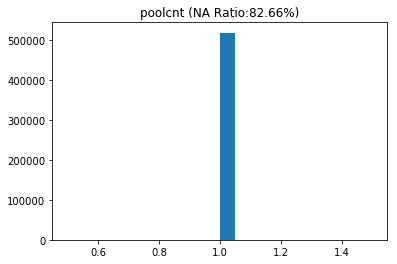

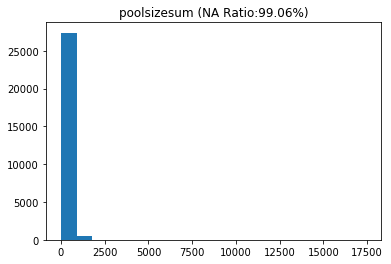

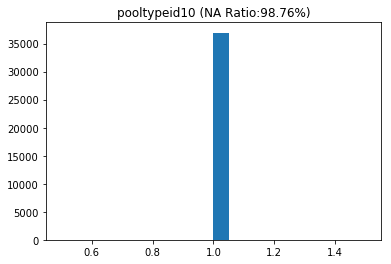

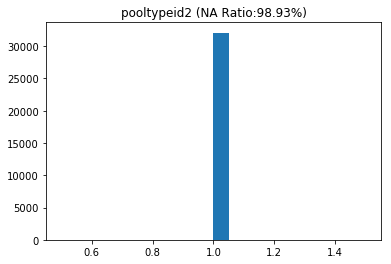

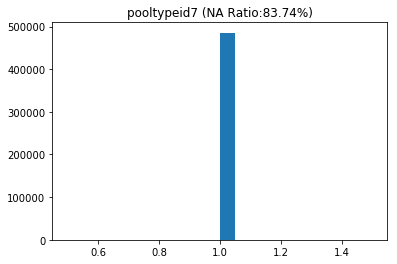

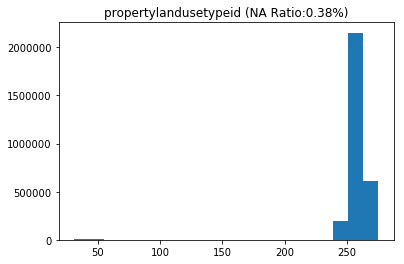

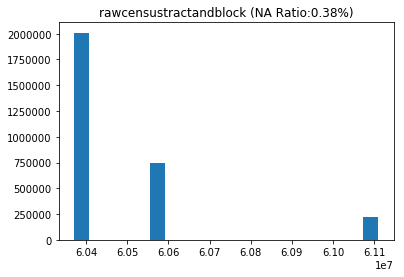

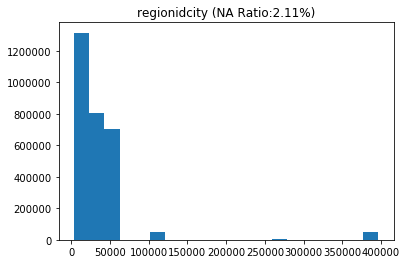

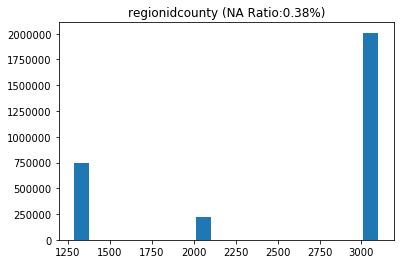

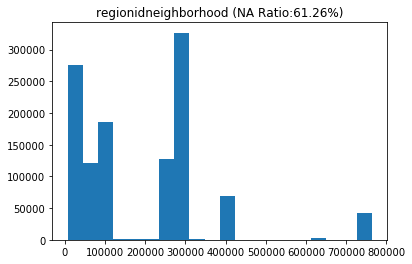

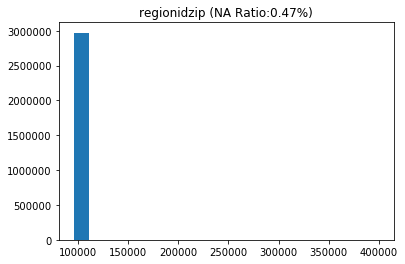

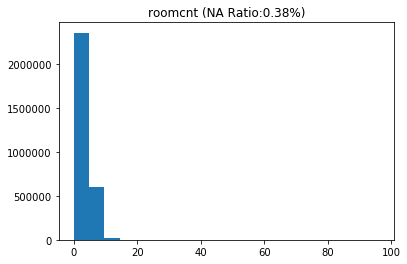

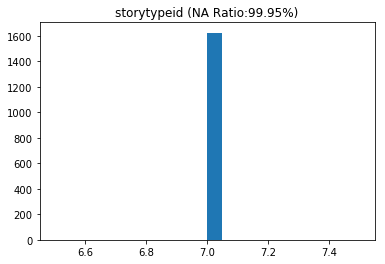

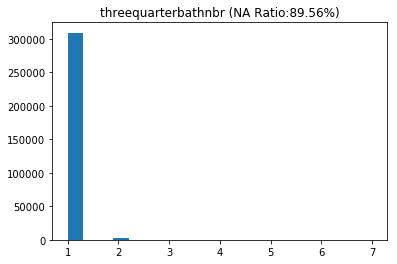

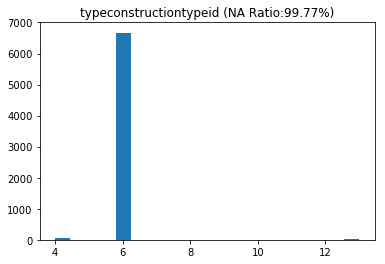

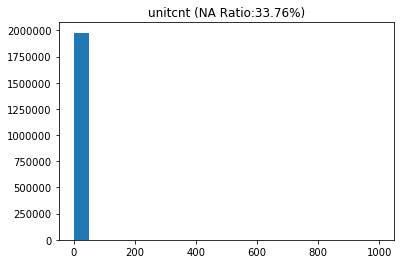

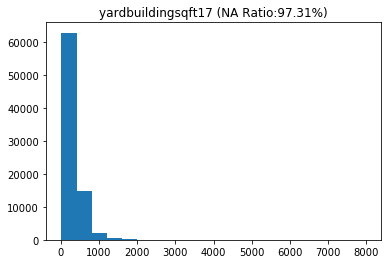

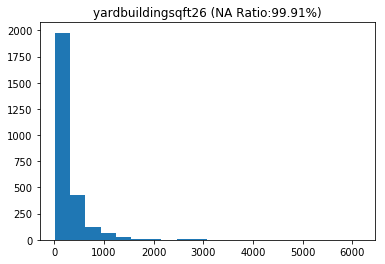

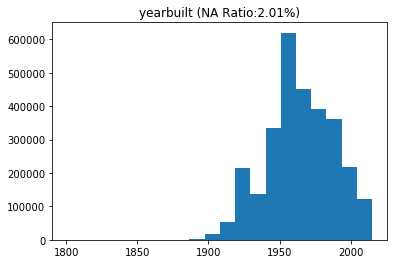

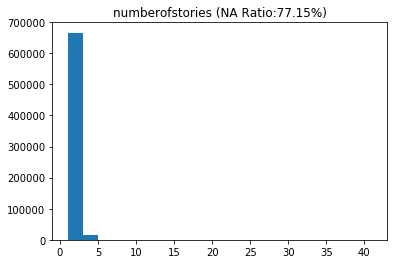

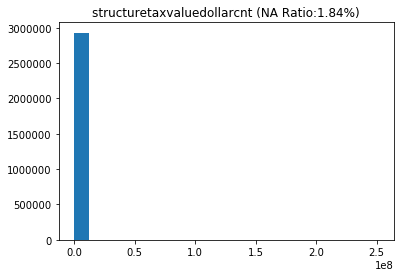

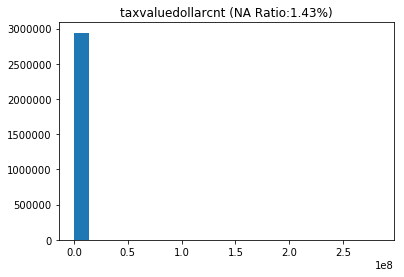

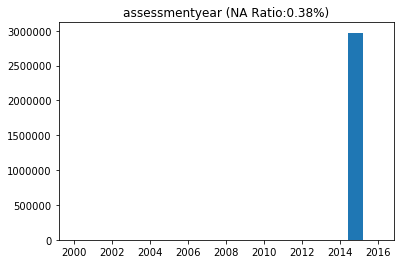

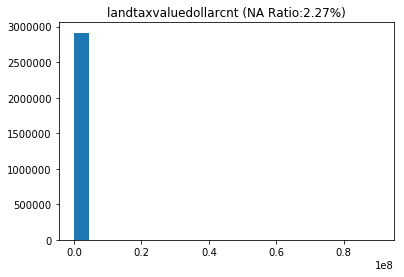

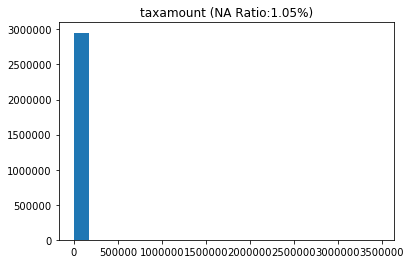

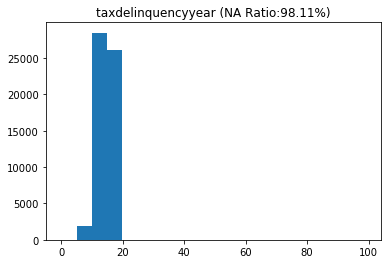

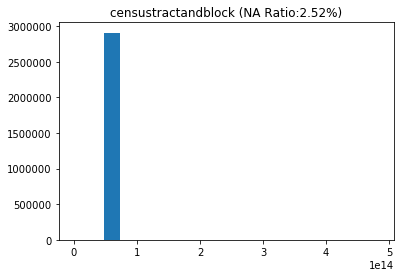

In [119]:
numeric_variables = properties.columns[properties.dtypes != 'object']
for var in numeric_variables:
    series = properties[var]
    na_ratio = series.isnull().sum()/series.shape[0]*100
    histgram_plot(series,is_numeric=True,na_ratio=na_ratio)

## Histgrams for categorical varibles

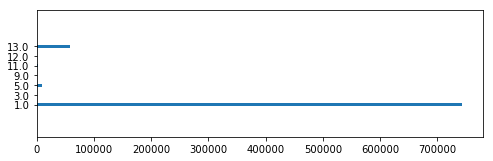

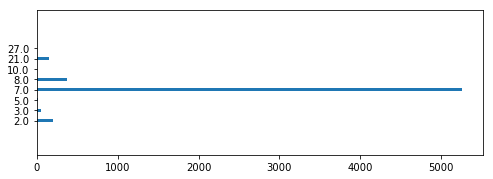

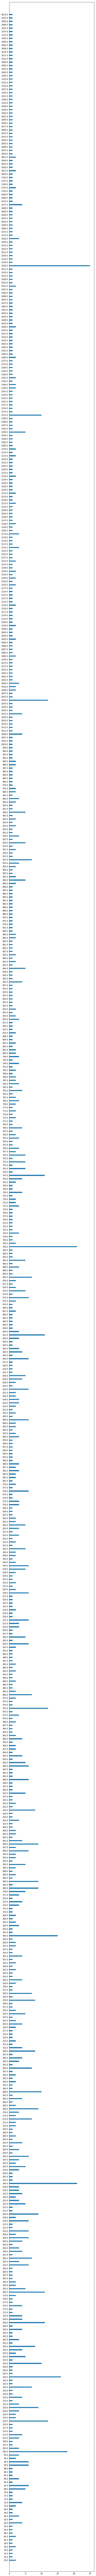

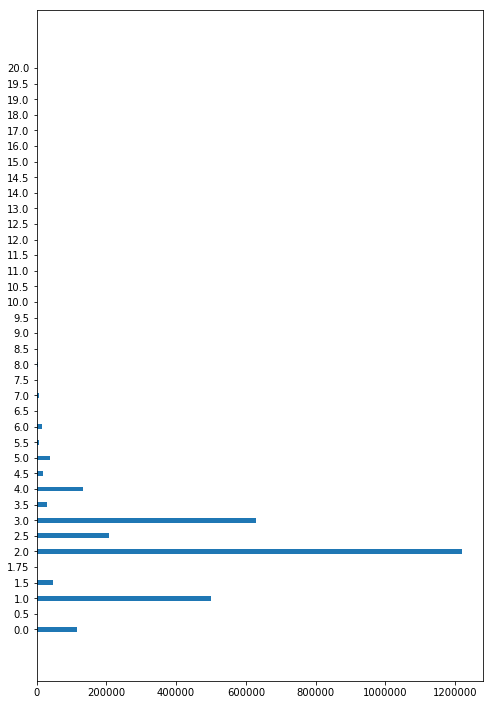

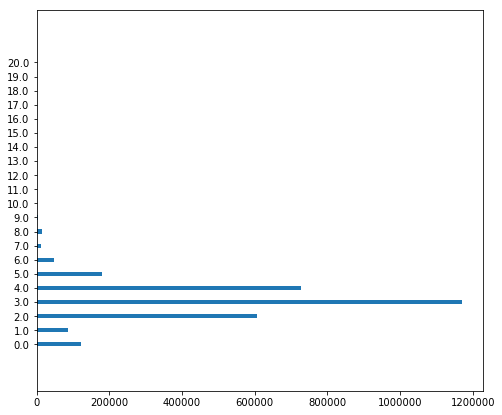

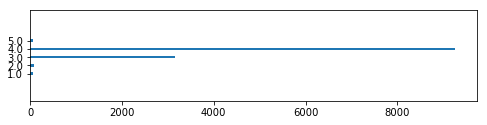

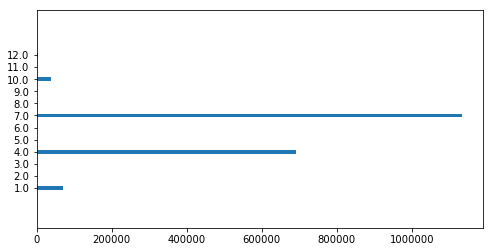

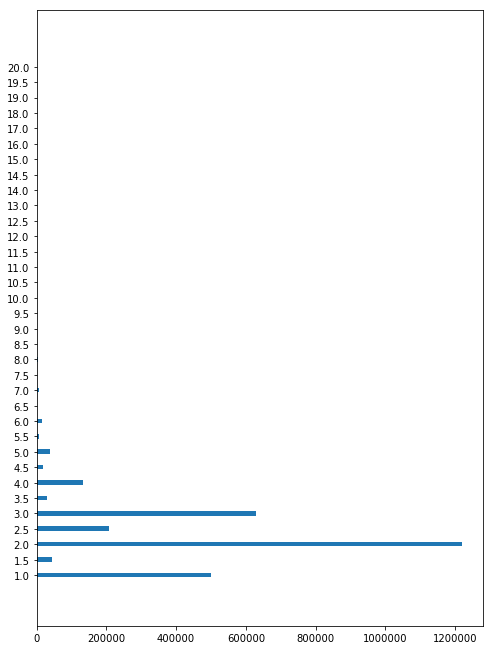

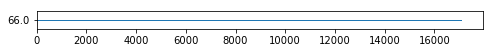

ValueError: Image size of 576x110496 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 576x302088 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 576x256080 pixels is too large. It must be less than 2^16 in each direction.

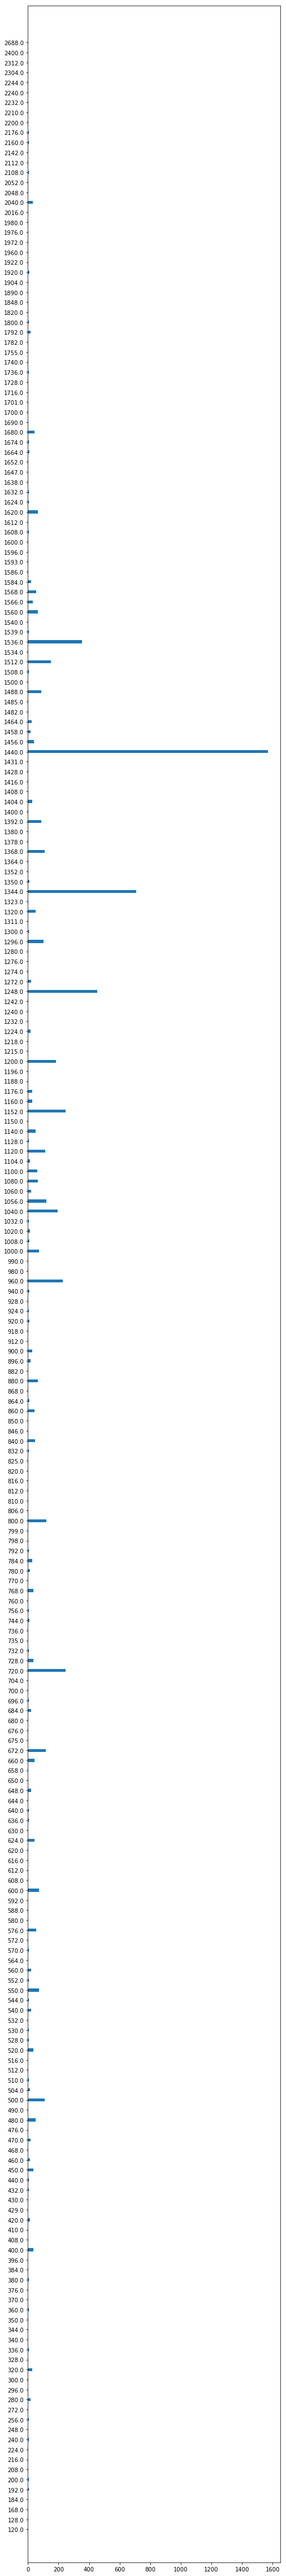

ValueError: Image size of 576x211584 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 576x115248 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 576x102024 pixels is too large. It must be less than 2^16 in each direction.

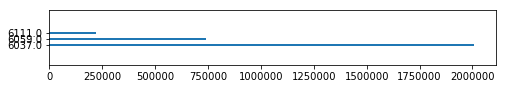

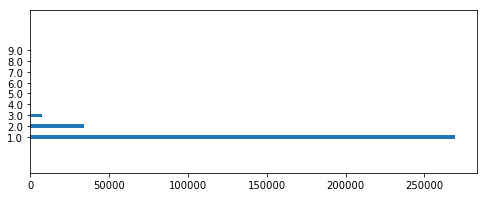

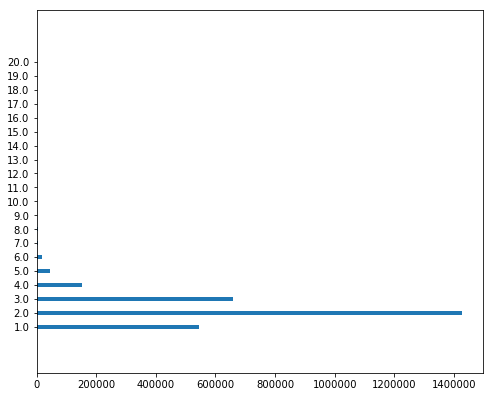

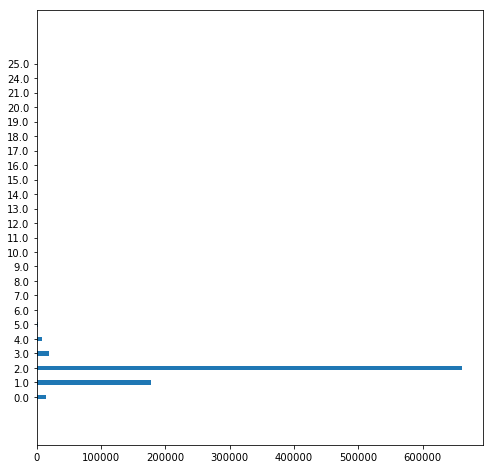

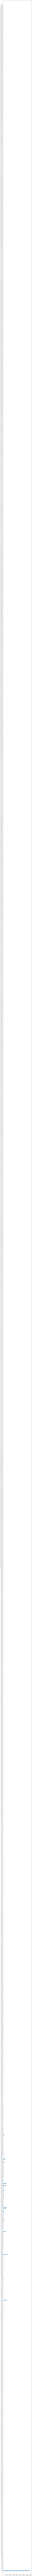

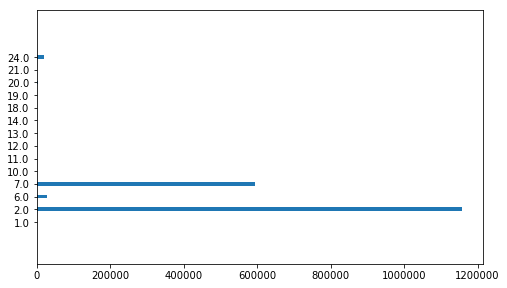

KeyboardInterrupt: 

In [120]:
category_variables = properties.columns[properties.dtypes == 'object']
for var in numeric_variables:
    series = properties[var]
    na_ratio = series.isnull().sum()/series.shape[0]*100
    histgram_plot(series,is_numeric=False,na_ratio=na_ratio)

## Normalization for numerical variables

In [257]:
for c, dtype in zip(properties.columns, properties.dtypes):	
    if dtype == np.float64:
        properties[c] = properties[c].astype(np.float32)

In [274]:
numeric_variables = properties.columns[properties.dtypes != 'object']
skewness = properties[numeric_variables].apply(lambda x: stats.skew(x,nan_policy='omit'))

Skewness > 3, logarithm transformation
< -3, exponential transformation

In [275]:
variables_log = skewness.index[skewness > 3]
variables_exp = skewness.index[skewness < -3]

In [364]:
# properties_log_trans = properties[variables_log].apply(lambda x: np.log1p(x))
# properties_log_trans.columns = properties_log_trans.columns + '_log'
for var in variables_log:
    properties[var] = properties[var].apply(lambda x: np.log1p(x))

for var in variables_exp:
    properties[var] = properties[var].apply(lambda x: np.exp(x))

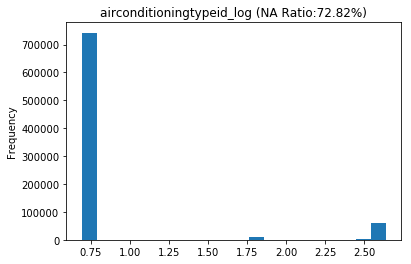

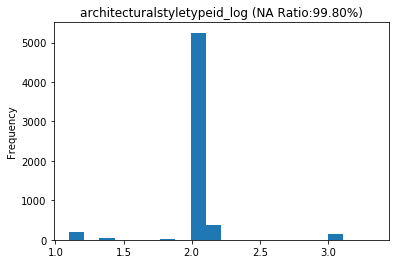

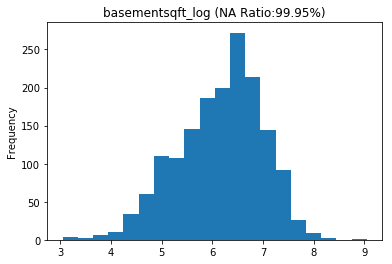

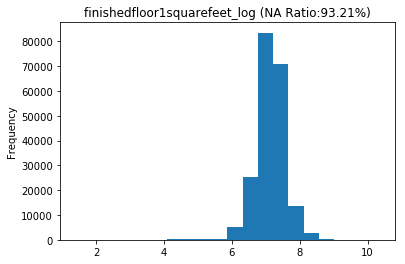

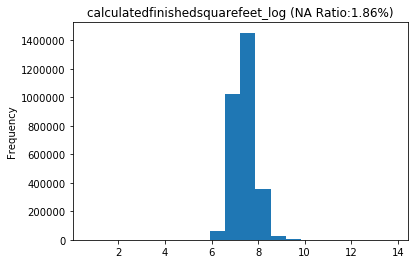

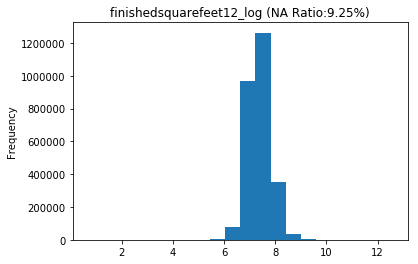

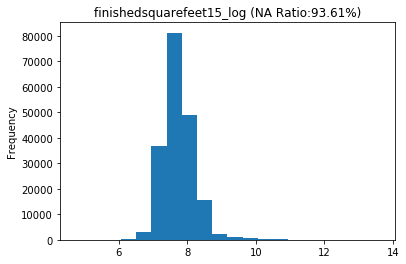

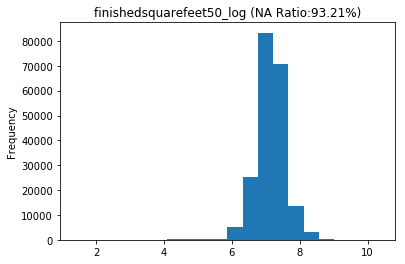

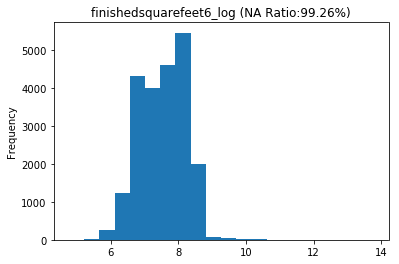

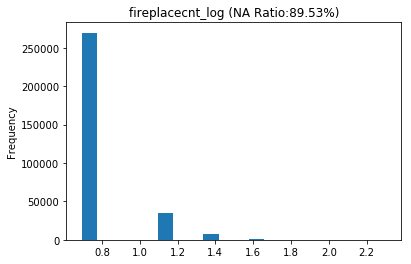

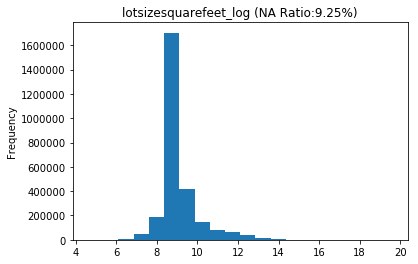

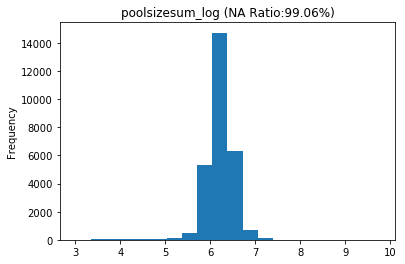

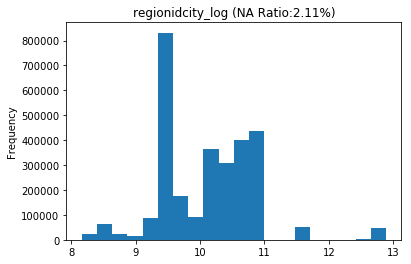

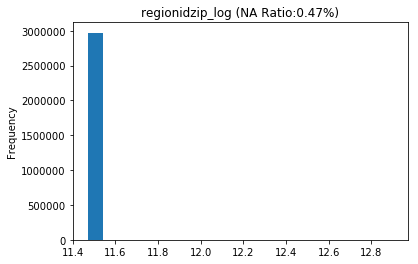

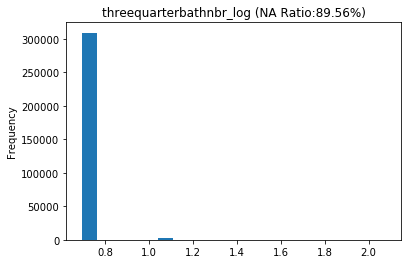

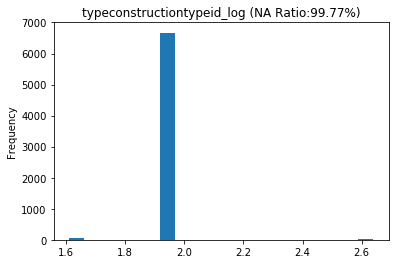

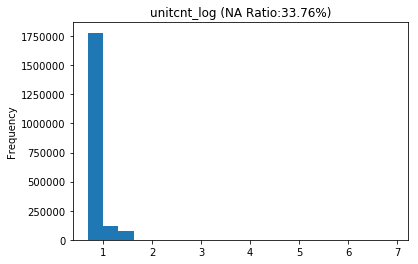

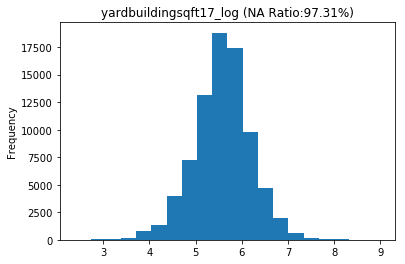

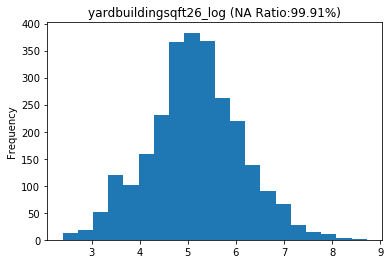

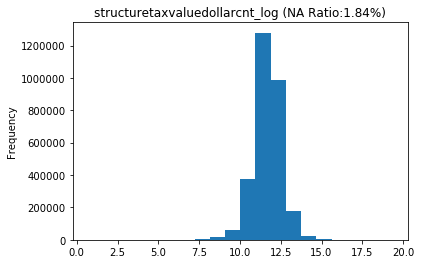

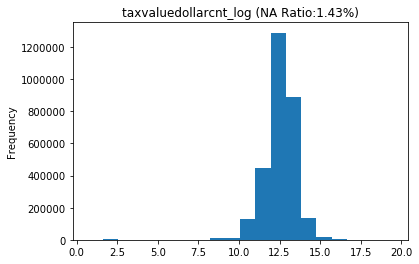

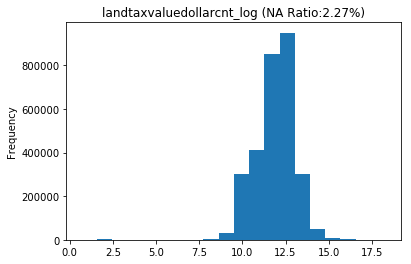

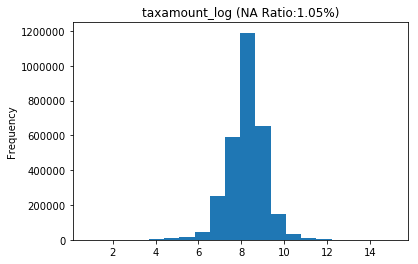

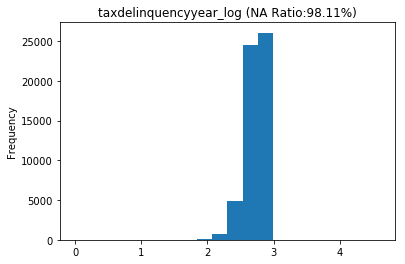

ValueError: range parameter must be finite.

In [45]:
for var in properties_log_trans:
    series = properties_log_trans[var]
    na_ratio = series.isnull().sum()/series.shape[0]*100
    histgram_plot(series,is_numeric=True,na_ratio=na_ratio)

## Concatenate original data and log-transformed data

In [3]:
data = pd.concat([properties], axis=1)

In [4]:
# data = data.drop('censustractandblock_log', axis=1)
train_columns = data.columns

## Explore NAs and generate new variables

In [5]:
data_na = data.isnull()
for var in data_na:
    data_na[var] = data_na[var].isnull().map({True:1, False:0})

## Encoding

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
for var in data.columns[data.dtypes == 'object']:
    var_temp = data[var].dropna()
    data[var][~data[var].isnull()] = le.fit_transform(var_temp)

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Fill NAs


In [8]:
for var in data.columns[data.dtypes == 'object']:
    data[var] = data[var].fillna(data[var].mode())

In [9]:
for var in data.columns[data.dtypes != 'object']:
    data[var] = data[var].fillna(data[var].dropna().mean())

In [10]:
data['parcelid'] = data.index
data = data.reset_index(drop=True)

## logerror


In [97]:
train_df = pd.read_table('train_2016.csv', header=0, index_col=None, sep=',')

In [98]:
print(train_df[:10])
print(train.shape)
print(len(np.unique(train_df['parcelid'])))

   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
5  11509835   -0.2705      2016-01-02
6  12286022    0.0440      2016-01-02
7  17177301    0.1638      2016-01-02
8  14739064   -0.0030      2016-01-02
9  14677559    0.0843      2016-01-03
(90811, 3)
90682


In [104]:
id_count = train_df['parcelid'].value_counts()
index_dup2 = [i for i, x in enumerate(train_df['parcelid']) if x in id_count[id_count==2].index]
index_dup3 = [i for i, x in enumerate(train_df['parcelid']) if x in id_count[id_count==3].index]

In [105]:
train_dup2 = train_df.ix[index_dup, :].sort_values('parcelid')

In [106]:
from datetime import datetime
train_dup2['month'] = train_dup2['transactiondate'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').strftime('%m'))
train_dup2['month'] = train_dup2['month'].apply(int)

In [120]:
train_dup2 = train_dup2.sort_values(['parcelid', 'month']).reset_index(drop=True)
train_dup2 = train_dup2.drop([90,91,92], axis=0).reset_index(drop=True)

In [121]:
train_dup2[80:100]

,parcelid,logerror,transactiondate,month
80,11729067,-0.3798,2016-05-19,5
81,11729067,-0.3581,2016-12-22,12
82,11735136,-0.0429,2016-03-09,3
83,11735136,-0.0030,2016-08-19,8
84,11742566,-0.0812,2016-01-08,1
85,11742566,0.0686,2016-08-04,8
86,11747818,-0.2058,2016-01-26,1
87,11747818,-0.1065,2016-04-14,4
88,11822007,0.0421,2016-06-03,6
89,11822007,0.0440,2016-12-08,12


In [96]:
(id_count==2).sum()

127

In [90]:
train_dup2.shape

(257, 4)

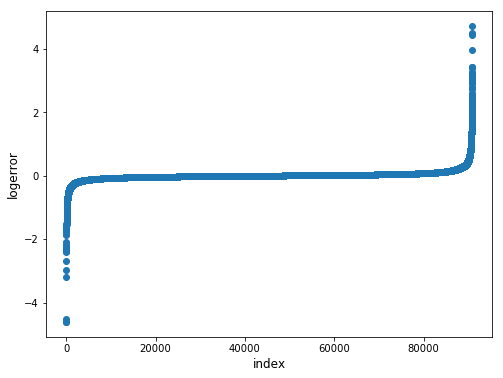

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [13]:
np.unique(train_df.index).shape

(90811,)

In [14]:
train_df.shape

(90811, 3)

In [15]:
train_df.groupby('parcelid').mean().head()

,logerror
parcelid,
10711738,0.0276
10711755,-0.0182
10711805,-0.1009
10711816,-0.0121
10711858,-0.0481


##  sample submission

In [16]:
sample = pd.read_table('sample_submission.csv', header=0, sep=',')
sample['parcelid'] = sample['ParcelId']

In [17]:
df_test = sample.merge(data, on='parcelid', how='left')

In [18]:
X_test = df_test[train_columns]

## train

In [19]:
train = pd.read_table('train_2016.csv', sep=',')

In [20]:
df_train = train.merge(data, how='left', on='parcelid')

In [21]:
X_train = df_train[train_columns]

In [22]:
y_train = df_train['logerror']

## Modeling


In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [34]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X_train, y_train, 
                                                test_size=0.3,
                                                random_state=1234)

### Parameter Tuning for XGB

In [30]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [381]:
scorer_mae = make_scorer(mean_absolute_error, greater_is_better=False)
def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'xgb':
        reg = xgb.XGBRegressor(**params)
    else:
        return 0, 0
    cv_score = cross_val_score(reg, X_train, y_train, scoring=scorer_mae, cv=5)
    score_mean = cv_score.mean()
    score_std = cv_score.std()
    return score_mean, score_std

In [382]:
space = hp.choice('classifier_type', [
    {
        'type': 'xgb',
        'learning_rate': hp.uniform('learning_rate', 0.02, 0.04),
        'min_child_weight': hp.choice('min_child_weight', range(30, 60)),
        'max_depth': hp.choice('max_depth', range(3, 7)),
        'subsample': hp.uniform('subsample', 0.2, 0.4),
        'n_estimators': hp.choice('n_estimators', range(150, 200)),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 0.6),
        'reg_lambda': hp.uniform('reg_lambda', 1, 2),
        'reg_alpha': hp.uniform('reg_alpha', 1, 2)
}])

In [383]:
def f(params):
    global best, count
    count += 1
    result = hyperopt_train_test(params.copy())
    acc = result[0]
    std = result[1]
    print('iters:', count, ', acc:', acc, 'std:', std, '\nusing', params, '\n')
    return {'loss': -acc, 'status': STATUS_OK}

In [384]:
count = 0 
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=50, trials=trials)

iters: 1 , acc: -0.0695487919412 std: 0.00299865873214 
using {'reg_alpha': 1.600596563522768, 'max_depth': 6, 'min_child_weight': 50, 'reg_lambda': 1.5526388882577766, 'colsample_bytree': 0.48465392511773114, 'subsample': 0.39739244761966264, 'n_estimators': 169, 'learning_rate': 0.03287480086992926, 'type': 'xgb'} 

iters: 2 , acc: -0.0699649721827 std: 0.00305602940511 
using {'reg_alpha': 1.0689809321583108, 'max_depth': 6, 'min_child_weight': 58, 'reg_lambda': 1.6109124655319305, 'colsample_bytree': 0.4570642984649969, 'subsample': 0.22600178905776436, 'n_estimators': 161, 'learning_rate': 0.027816353368820657, 'type': 'xgb'} 

iters: 3 , acc: -0.0694849552555 std: 0.0030300426346 
using {'reg_alpha': 1.744131465791308, 'max_depth': 5, 'min_child_weight': 47, 'reg_lambda': 1.221095701078934, 'colsample_bytree': 0.5224377603041043, 'subsample': 0.3023748472869261, 'n_estimators': 178, 'learning_rate': 0.030585158986855113, 'type': 'xgb'} 

iters: 4 , acc: -0.0693801808197 std: 0.00

KeyboardInterrupt: 

### Parameter Tuning for LightGBM

In [27]:
space = hp.choice('classifier_type', [
    {
        'type': 'lightgbm',
        'learning_rate': hp.uniform('learning_rate', 0.02, 0.04),
        'max_bin': hp.choice('max_bin', range(5, 12)),
        'feature_fraction': hp.uniform('feature_fraction', 0.6, 0.9),
        'bagging_freq': hp.choice('bagging_freq', range(30,50)),
        'num_leaves': hp.choice('num_leaves', range(60, 120)),
}])

In [35]:
import lightgbm as lgb
d_train = lgb.Dataset(xtrain, label=ytrain)
d_valid = lgb.Dataset(xvalid, label=yvalid)

In [44]:
params = {}
params['max_bin'] = 40
params['learning_rate'] = 0.0021 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'          # or 'mae'
params['sub_feature'] = 0.5      # feature_fraction 
params['bagging_freq'] = 40
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05  

----
Score: 0.06920136

learning rate:0.02, max_bin:40, feature_fraction:0.6, bagging_freq:50, num_leaves:20

In [58]:
watchlist = [d_valid]
for lr in [0.02]:
    for m_bin in [40]: # 0.06987263
        for feat_frac in [0.6]: # 0.06987263
            for bag_freq in [50]: # 0.06987261
                for leaves in [20]: # 0.06920136
                    params['learning_rate'] = lr
                    params['max_bin'] = m_bin
                    params['feature_fraction'] = feat_frac
                    params['bagging_freq'] = bag_freq
                    params['num_leaves'] = leaves
                    clf = lgb.train(params, d_train, 400, watchlist, verbose_eval=False)
                    yvalid_pred = clf.predict(xvalid)
                    mae = mean_absolute_error(y_pred=yvalid_pred, y_true=yvalid)
                    if mae < 0.07:
                        print('Score:{0:.8f}, learning rate:{1}, max_bin:{2}, feature_fraction:{3}, bagging_freq:{4}, num_leaves:{5}'.format(mae, lr, m_bin, feat_frac, bag_freq, leaves))

In [43]:
watchlist = [d_valid]
clf = lgb.train(params, d_train, 400, watchlist)

[1]	valid_0's l1: 0.0691499
[2]	valid_0's l1: 0.0691481
[3]	valid_0's l1: 0.0691448
[4]	valid_0's l1: 0.0691421
[5]	valid_0's l1: 0.06914
[6]	valid_0's l1: 0.0691382
[7]	valid_0's l1: 0.0691365
[8]	valid_0's l1: 0.0691346
[9]	valid_0's l1: 0.0691318
[10]	valid_0's l1: 0.06913
[11]	valid_0's l1: 0.0691265
[12]	valid_0's l1: 0.0691252
[13]	valid_0's l1: 0.0691232
[14]	valid_0's l1: 0.0691194
[15]	valid_0's l1: 0.0691174
[16]	valid_0's l1: 0.0691161
[17]	valid_0's l1: 0.0691132
[18]	valid_0's l1: 0.0691099
[19]	valid_0's l1: 0.0691076
[20]	valid_0's l1: 0.0691045
[21]	valid_0's l1: 0.0691016
[22]	valid_0's l1: 0.0690999
[23]	valid_0's l1: 0.0690982
[24]	valid_0's l1: 0.069096
[25]	valid_0's l1: 0.0690942
[26]	valid_0's l1: 0.0690924
[27]	valid_0's l1: 0.069091
[28]	valid_0's l1: 0.0690886
[29]	valid_0's l1: 0.0690854
[30]	valid_0's l1: 0.0690822
[31]	valid_0's l1: 0.0690804
[32]	valid_0's l1: 0.0690782
[33]	valid_0's l1: 0.0690748
[34]	valid_0's l1: 0.0690726
[35]	valid_0's l1: 0.0690708


In [38]:
yvalid_pred = clf.predict(xvalid)
print('Score:', mean_absolute_error(y_pred=yvalid_pred, y_true=yvalid))

Score: 0.0687893147298


## Benchmark:
Mean: 0.0692658731759 

std: 0.00306727723934


In [385]:
params = {'reg_alpha': 1.911432478941234, 'max_depth': 3, 
          'min_child_weight': 52, 'reg_lambda': 1.757557616761029, 
          'colsample_bytree': 0.5664545978640692, 
          'subsample': 0.318645458140795, 'n_estimators': 153, 
          'learning_rate': 0.039607922651323145,}
reg = xgb.XGBRegressor()
reg.set_params(**params)

XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.5664545978640692, gamma=0,
       learning_rate=0.039607922651323145, max_delta_step=0, max_depth=3,
       min_child_weight=52, missing=None, n_estimators=153, nthread=-1,
       objective='reg:linear', reg_alpha=1.911432478941234,
       reg_lambda=1.757557616761029, scale_pos_weight=1, seed=0,
       silent=True, subsample=0.318645458140795)

In [386]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.5664545978640692, gamma=0,
       learning_rate=0.039607922651323145, max_delta_step=0, max_depth=3,
       min_child_weight=52, missing=None, n_estimators=153, nthread=-1,
       objective='reg:linear', reg_alpha=1.911432478941234,
       reg_lambda=1.757557616761029, scale_pos_weight=1, seed=0,
       silent=True, subsample=0.318645458140795)

In [387]:
y_pred = reg.predict(X_test)

## Export result

In [388]:
sample = sample.drop('parcelid', axis=1)

In [389]:
for col in sample.columns[1:]:
    sample[col] = y_pred

In [390]:
sample.to_csv('result.csv', sep=',', index=False)